In [1]:
import time
import numpy as np
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
from astropy import stats, visualization

from sbigclient.sbigcam import MATCam, F9WFSCam

%load_ext autoreload
%autoreload 2

In [2]:
c = MATCam()

SBIG CCD CONNECTION Connection SwitchVector OneOfMany
    CONNECT Connect Switch On
    DISCONNECT Disconnect Switch Off
SBIG CCD DRIVER_INFO Driver Info TextVector read only
    DRIVER_NAME Name Text SBIG CCD
    DRIVER_EXEC Exec Text indi_sbig_ccd
    DRIVER_VERSION Version Text 1.8
    DRIVER_INTERFACE Interface Text 18
SBIG CCD SIMULATION Simulation SwitchVector OneOfMany
    ENABLE Enable Switch Off
    DISABLE Disable Switch On
SBIG CCD CONFIG_PROCESS Configuration SwitchVector AtMostOne
    CONFIG_LOAD Load Switch Off
    CONFIG_SAVE Save Switch Off
    CONFIG_DEFAULT Default Switch Off
SBIG CCD ACTIVE_DEVICES Snoop devices TextVector read and write
    ACTIVE_TELESCOPE Telescope Text Telescope Simulator
    ACTIVE_FOCUSER Focuser Text Focuser Simulator
    ACTIVE_FILTER Filter Text CCD Simulator
    ACTIVE_SKYQUALITY Sky Quality Text SQM
SBIG CCD DEVICE_PORT_TYPE Port SwitchVector OneOfMany
    Ethernet Ethernet Switch Off
    USB 1 USB 1 Switch On
    USB 2 USB 2 Switch Off
  

In [3]:
c.connect()

SBIG CCD CONNECTION Connection SwitchVector OneOfMany
    CONNECT Connect Switch On
    DISCONNECT Disconnect Switch Off
SBIG CCD CONNECTION Connection SwitchVector OneOfMany
    CONNECT Connect Switch On
    DISCONNECT Disconnect Switch Off


In [4]:
c.process_events()

In [5]:
f = c.expose(exptime=1.0, exptype="Dark")

SBIG CCD CCD_FRAME_TYPE Frame Type SwitchVector OneOfMany
    FRAME_LIGHT Light Switch Off
    FRAME_BIAS Bias Switch Off
    FRAME_DARK Dark Switch On
    FRAME_FLAT Flat Switch Off
SBIG CCD CCD_EXPOSURE Expose NumberVector read and write
    CCD_EXPOSURE_VALUE Duration (s) Number 1.0
reading out...


<IPython.core.display.Javascript object>


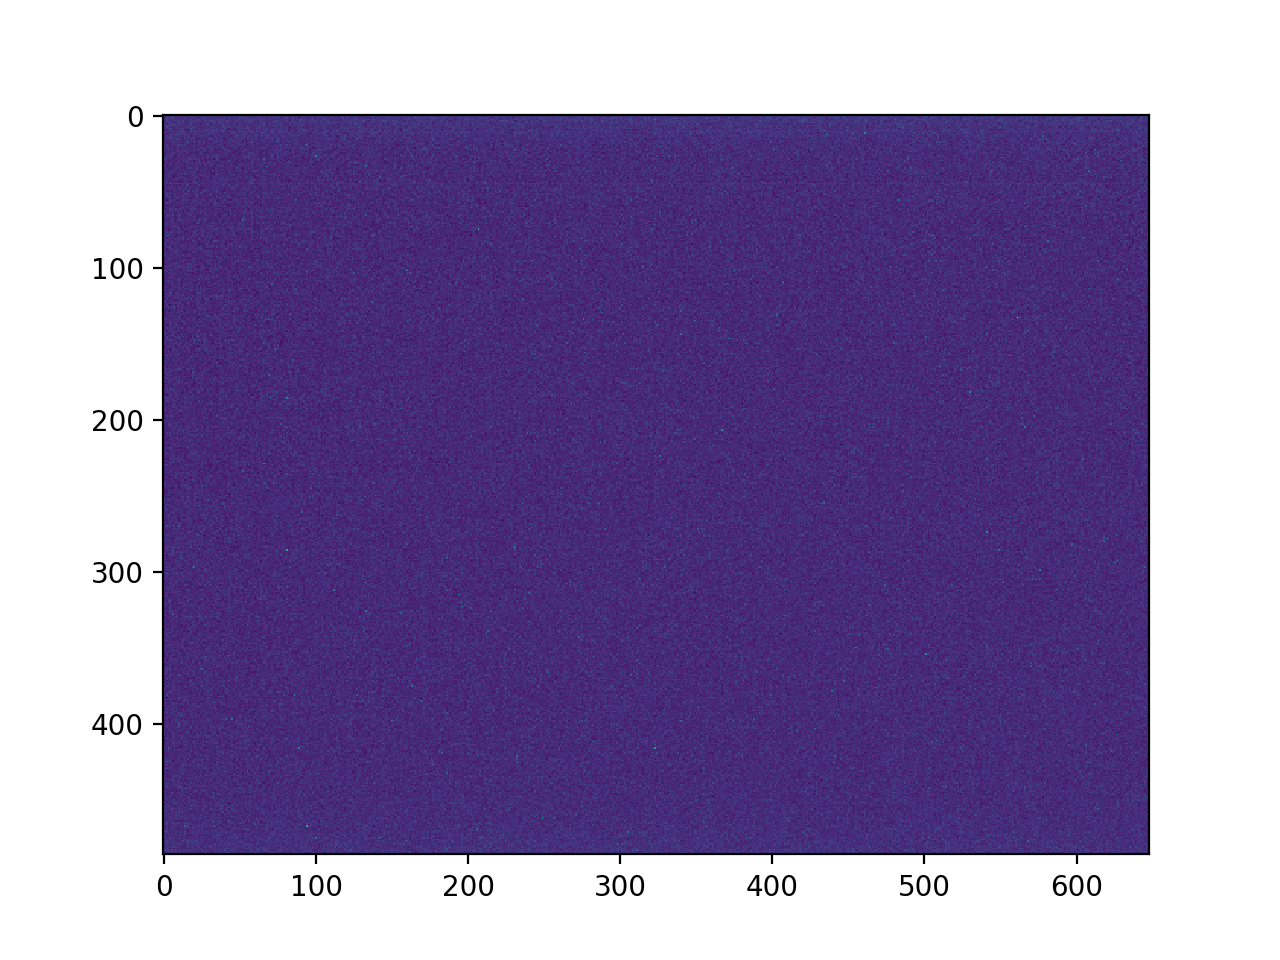

In [6]:
norm = visualization.mpl_normalize.ImageNormalize(stretch=visualization.SqrtStretch())
plt.imshow(f[0].data, norm=norm)
plt.show()

In [ ]:
f[0].data.mean()

In [7]:
f9 = F9WFSCam()

SBIG CCD CONNECTION Connection SwitchVector OneOfMany
    CONNECT Connect Switch On
    DISCONNECT Disconnect Switch Off
SBIG CCD DRIVER_INFO Driver Info TextVector read only
    DRIVER_NAME Name Text SBIG CCD
    DRIVER_EXEC Exec Text indi_sbig_ccd
    DRIVER_VERSION Version Text 1.8
    DRIVER_INTERFACE Interface Text 22
SBIG CCD SIMULATION Simulation SwitchVector OneOfMany
    ENABLE Enable Switch Off
    DISABLE Disable Switch On
SBIG CCD CONFIG_PROCESS Configuration SwitchVector AtMostOne
    CONFIG_LOAD Load Switch Off
    CONFIG_SAVE Save Switch Off
    CONFIG_DEFAULT Default Switch Off
SBIG CCD ACTIVE_DEVICES Snoop devices TextVector read and write
    ACTIVE_TELESCOPE Telescope Text Telescope Simulator
    ACTIVE_FOCUSER Focuser Text Focuser Simulator
    ACTIVE_FILTER Filter Text CCD Simulator
    ACTIVE_SKYQUALITY Sky Quality Text SQM
SBIG CCD DEVICE_PORT_TYPE Port SwitchVector OneOfMany
    Ethernet Ethernet Switch On
    USB 1 USB 1 Switch Off
    USB 2 USB 2 Switch Off
  

In [8]:
f9.process_events()

SBIG CCD CCD_TEMPERATURE Temperature NumberVector read and write
    CCD_TEMPERATURE_VALUE Temperature (C) Number 6.3659816053852722462
SBIG CCD CCD_COOLER_POWER Cooler % NumberVector read only
    CCD_COOLER_VALUE [%] Number 14.117647058823528994


In [ ]:
v = f9.get_vector("SBIG CCD", "CCD_BINNING")
e = v.elements[0]

In [ ]:
for e in v.elements:
    print("%s %s" % (e.getName(), e.get_int()))

In [9]:
f9.connect()
time.sleep(1)
f9.process_events()

SBIG CCD CONNECTION Connection SwitchVector OneOfMany
    CONNECT Connect Switch On
    DISCONNECT Disconnect Switch Off


In [10]:
f9.connected

True

In [11]:
f9.process_events()

In [50]:
f9.wfs_config()

In [51]:
f9.binning

{'X': 3, 'Y': 3}

In [52]:
f9.get_float("SBIG CCD", "CCD_FRAME", "Y")

0.0

In [53]:
f = f9.expose(exptime=1.0, exptype="Dark")

SBIG CCD CCD_FRAME_TYPE Frame Type SwitchVector OneOfMany
    FRAME_LIGHT Light Switch Off
    FRAME_BIAS Bias Switch Off
    FRAME_DARK Dark Switch On
    FRAME_FLAT Flat Switch Off
SBIG CCD CCD_EXPOSURE Expose NumberVector read and write
    CCD_EXPOSURE_VALUE Duration (s) Number 1.0
reading out...


<IPython.core.display.Javascript object>


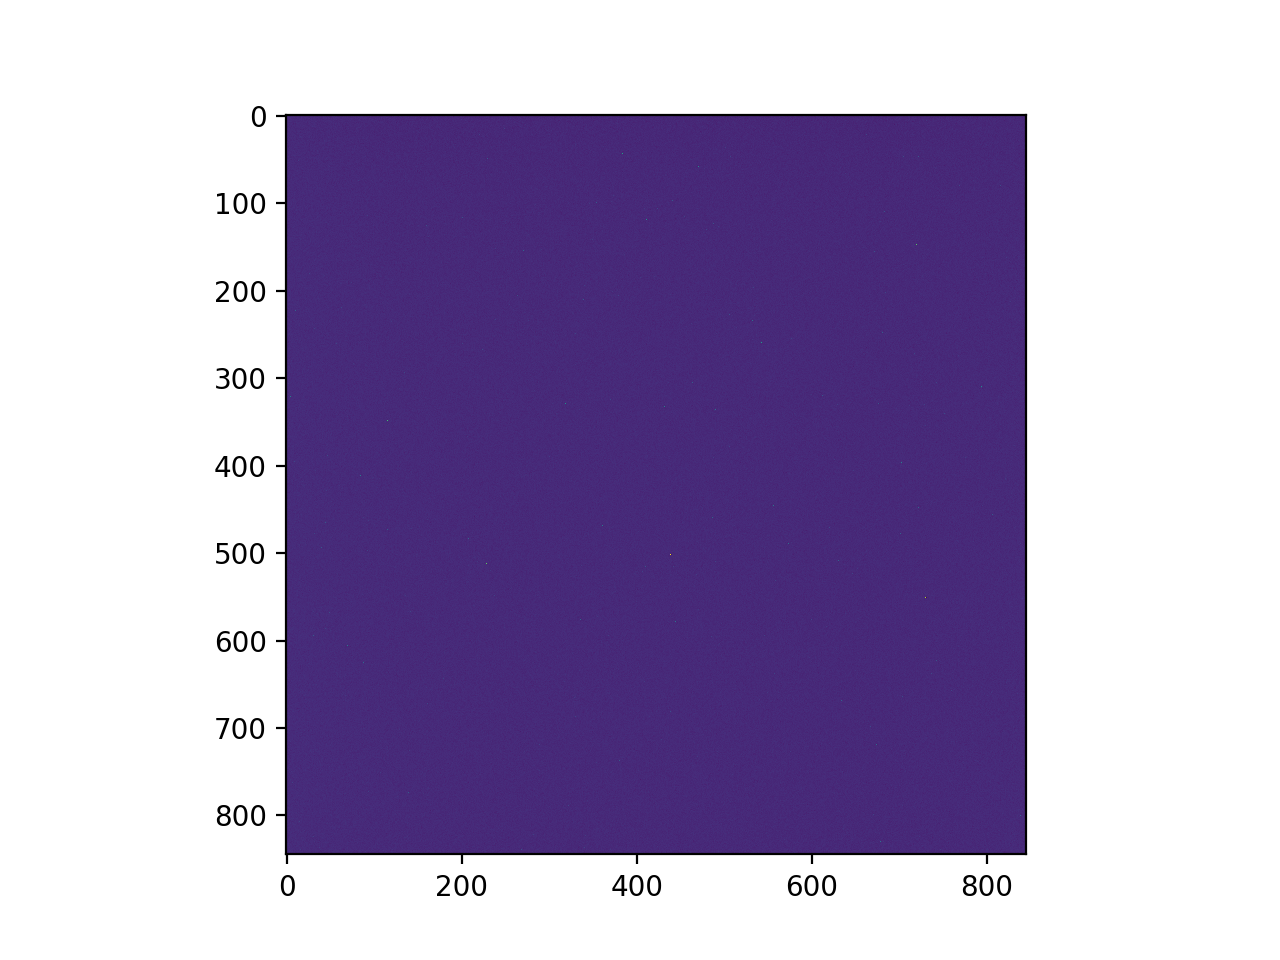

In [54]:
norm = visualization.mpl_normalize.ImageNormalize(stretch=visualization.SqrtStretch())
plt.imshow(f[0].data, norm=norm)
plt.show()

In [48]:
f.writeto("blah_default.fits", clobber=True)

In [49]:
f[0].data.mean()

923.75302958462373

In [ ]:
f9.get_float("SBIG CCD", "CCD_TEMPERATURE", "CCD_TEMPERATURE_VALUE")

In [ ]:
f9.get_float("SBIG CCD", "CCD_COOLER_POWER", "CCD_COOLER_VALUE")

In [ ]:
f9.temperature = 5.0

In [ ]:
f9.temperature

In [ ]:
f9.cooling_power

In [ ]:
f9.get_float("SBIG CCD", "CCD_TEMPERATURE", "CCD_TEMPERATURE_VALUE")

In [ ]:
f9.cooler

In [ ]:
f9.process_receive_vector_queue()

In [ ]:
f9.connect()

In [ ]:
f9.process_events()

In [ ]:
f9.temperature

In [ ]:
f9.cooling_on()

In [ ]:
f.writeto("blah.fits", clobber=True)

In [ ]:
f9.ccd_info